In [ ]:
%matplotlib inline


# Multicolored lines


This example shows how to make a multi-colored line. In this example, the line
is colored based on its derivative.


(-1.1, 1.1)

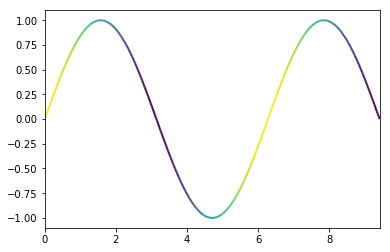

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs.add_collection(lc)
# fig.colorbar(line, ax=axs)
# 
# Use a boundary norm instead
# cmap = ListedColormap(['r', 'g', 'b'])
# norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
# lc = LineCollection(segments, cmap=cmap, norm=norm)
# lc.set_array(dydx)
# lc.set_linewidth(2)
# line = axs[1].add_collection(lc)
# fig.colorbar(line, ax=axs[1])

axs.set_xlim(x.min(), x.max())
axs.set_ylim(-1.1, 1.1)
